<a href="https://colab.research.google.com/github/J0SAL/Learning-DL/blob/main/codebasics/7.%20Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation To Address Overfitting In Flower Classification CNN



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
# change the above path to windows path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
# get all jpg images 
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/5674707921_1ffd141bab_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14576445793_582aa6446b_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/148180650_19a4b410db.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15268682367_5a4512b29f_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/160456948_38c3817c6a_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg')]

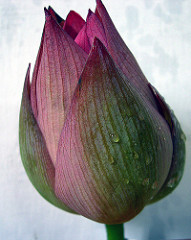

In [11]:
PIL.Image.open(str(roses[122]))

In [12]:
# create dictionary 
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3753920123_c7ebc18ee3.jpg')]

In [16]:
# to numpy array
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[124, 113, 115],
        [ 73,  67,  68],
        [ 20,  21,  19],
        ...,
        [ 37,  56,  69],
        [ 57,  78,  86],
        [ 79,  94, 110]],

       [[122, 111, 113],
        [ 71,  67,  66],
        [ 19,  20,  18],
        ...,
        [ 67,  88, 103],
        [ 76,  96, 107],
        [ 84, 100, 116]],

       [[121, 111, 111],
        [ 71,  67,  66],
        [ 20,  21,  17],
        ...,
        [ 84, 104, 121],
        [ 81, 103, 115],
        [ 86, 102, 119]],

       ...,

       [[185, 183, 175],
        [176, 174, 166],
        [162, 161, 151],
        ...,
        [185, 138, 217],
        [142, 100, 183],
        [126,   2, 208]],

       [[207, 208, 198],
        [177, 178, 168],
        [146, 147, 137],
        ...,
        [170, 139, 200],
        [147,  77, 238],
        [ 96,  54, 142]],

       [[186, 190, 179],
        [178, 182, 171],
        [166, 170, 158],
        ...,
        [115,  95, 160],
        [110,   0, 206],
        [192, 129, 233]]

In [17]:
img.shape

(240, 159, 3)

In [18]:
# as we & ML model want all image to be of same size
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

# convert & resize all and append to X and y
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

**Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Building CNN and training it

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 106s 1s/step - loss: 1.3247 - accuracy: 0.4564
Epoch 2/30
86/86 [==============================] - 98s 1s/step - loss: 0.9760 - accuracy: 0.6217
Epoch 3/30
86/86 [==============================] - 79s 916ms/step - loss: 0.7752 - accuracy: 0.7115
Epoch 4/30
86/86 [==============================] - 77s 895ms/step - loss: 0.5307 - accuracy: 0.8085
Epoch 5/30
86/86 [==============================] - 82s 953ms/step - loss: 0.3247 - accuracy: 0.8826
Epoch 6/30
86/86 [==============================] - 77s 890ms/step - loss: 0.1853 - accuracy: 0.9375
Epoch 7/30
86/86 [==============================] - 77s 891ms/step - loss: 0.1068 - accuracy: 0.9702
Epoch 8/30
86/86 [==============================] - 81s 946ms/step - loss: 0.0493 - accuracy: 0.9873
Epoch 9/30
86/86 [==============================] - 77s 892ms/step - loss: 0.0540 - accuracy: 0.9862
Epoch 10/30
86/86 [==============================] - 83s 971ms/step - loss: 0.0257 - accuracy: 0

In [24]:
model.evaluate(X_test_scaled,y_test) #on test cases

29/29 [==============================] - 7s 237ms/step - loss: 2.5846 - accuracy: 0.6721


[2.5845577716827393, 0.672113299369812]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

array([[ -5.5744343 ,   1.3434494 ,   8.286663  ,  -7.2612605 ,
         -5.9578643 ],
       [ -5.937374  ,  -8.862261  ,  -0.552624  ,   9.219209  ,
          3.0502098 ],
       [ -1.337936  ,  -1.099014  ,   5.0407786 ,  -5.7980423 ,
         -9.712459  ],
       ...,
       [-12.399749  , -12.789151  ,  -0.79375076,  22.698544  ,
        -16.066717  ],
       [ -5.765693  ,  -3.6228907 ,   1.0802262 ,  -3.079574  ,
          4.2200713 ],
       [ -7.617334  ,  -6.6623044 ,  -4.013534  ,   9.722074  ,
         -1.4578056 ]], dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])

In [27]:
np.argmax(score)

2

In [28]:
y_test[0]

1

**Improve Test Accuracy Using Data Augmentation**

In [31]:
img_height = img_width = 180
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
# more transformations check on website

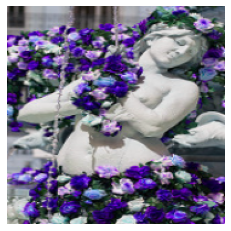

In [32]:
plt.axis('off')
plt.imshow(X[0])

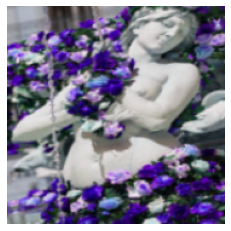

In [33]:
# new generated with data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

**Train the model using data augmentation and a drop out layer**

In [34]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 94s 1s/step - loss: 1.3216 - accuracy: 0.4444
Epoch 2/10
86/86 [==============================] - 93s 1s/step - loss: 1.0095 - accuracy: 0.6050
Epoch 3/10
86/86 [==============================] - 93s 1s/step - loss: 0.9308 - accuracy: 0.6497
Epoch 4/10
86/86 [==============================] - 91s 1s/step - loss: 0.8696 - accuracy: 0.6650
Epoch 5/10
86/86 [==============================] - 92s 1s/step - loss: 0.8033 - accuracy: 0.7009
Epoch 6/10
86/86 [==============================] - 91s 1s/step - loss: 0.7847 - accuracy: 0.7006
Epoch 7/10
86/86 [==============================] - 95s 1s/step - loss: 0.7535 - accuracy: 0.7097
Epoch 8/10
86/86 [==============================] - 92s 1s/step - loss: 0.7068 - accuracy: 0.7257
Epoch 9/10
86/86 [==============================] - 92s 1s/step - loss: 0.6623 - accuracy: 0.7471
Epoch 10/10
86/86 [==============================] - 92s 1s/step - loss: 0.6409 - accuracy: 0.7547


In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 254ms/step - loss: 0.7515 - accuracy: 0.7102


[0.7515363097190857, 0.7102396488189697]

With data augmentation the accuracy increased to 71 %!